In [331]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [332]:
df=pd.read_csv("dtdcData/0_1000_master_dtdc.csv",dtype='unicode',names=["org_pin", "dst_pin", "dst_state", "po_del", "dtdc_del", "box","len","wid","dep","vol_wt","act_wt","obj_cost","shipper","service","period","price","add_price","price_risk_sur","price_carr_risk_sur","price_own_risk_sur","price_with_ins","gstPer","basePrice","gst","gst_risk_sur","gst_carr_risk_sur","gst_own_risk_sur","edd","charge_wt"])

In [333]:
df_rest=pd.read_csv("dtdcData/1001_3000_master_dtdc.csv",dtype='unicode',names=["org_pin", "dst_pin", "dst_state", "po_del", "dtdc_del", "box","len","wid","dep","vol_wt","act_wt","obj_cost","shipper","service","period","price","add_price","price_risk_sur","price_carr_risk_sur","price_own_risk_sur","price_with_ins","gstPer","basePrice","gst","gst_risk_sur","gst_carr_risk_sur","gst_own_risk_sur","edd","charge_wt"])

In [334]:
pincode_data=pd.read_csv("india_pincode_geo_metro.csv")

In [335]:
pincode_data=pincode_data.drop(columns=['Unnamed: 0'])

In [336]:
pincode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pincode        19300 non-null  int64  
 1   Po_del         19300 non-null  bool   
 2   State          19300 non-null  object 
 3   Dtdc_del       19300 non-null  bool   
 4   LatitudeNum    19278 non-null  float64
 5   LongitudeNum   19277 non-null  float64
 6   hasMetroCity   19300 non-null  int64  
 7   isSpecialDest  19300 non-null  int64  
dtypes: bool(2), float64(2), int64(3), object(1)
memory usage: 942.5+ KB


In [337]:
df=df.drop_duplicates()

In [338]:
df_rest=df_rest.drop_duplicates()

In [339]:
df_rest.columns

Index(['org_pin', 'dst_pin', 'dst_state', 'po_del', 'dtdc_del', 'box', 'len',
       'wid', 'dep', 'vol_wt', 'act_wt', 'obj_cost', 'shipper', 'service',
       'period', 'price', 'add_price', 'price_risk_sur', 'price_carr_risk_sur',
       'price_own_risk_sur', 'price_with_ins', 'gstPer', 'basePrice', 'gst',
       'gst_risk_sur', 'gst_carr_risk_sur', 'gst_own_risk_sur', 'edd',
       'charge_wt'],
      dtype='object')

In [340]:
df.columns

Index(['org_pin', 'dst_pin', 'dst_state', 'po_del', 'dtdc_del', 'box', 'len',
       'wid', 'dep', 'vol_wt', 'act_wt', 'obj_cost', 'shipper', 'service',
       'period', 'price', 'add_price', 'price_risk_sur', 'price_carr_risk_sur',
       'price_own_risk_sur', 'price_with_ins', 'gstPer', 'basePrice', 'gst',
       'gst_risk_sur', 'gst_carr_risk_sur', 'gst_own_risk_sur', 'edd',
       'charge_wt'],
      dtype='object')

In [341]:
df = df.drop(columns=['dtdc_del', 'box','len','wid','dep','shipper','add_price','price_risk_sur', 'price_carr_risk_sur',
       'price_own_risk_sur', 'price_with_ins','gst_risk_sur', 'gst_carr_risk_sur', 'gst_own_risk_sur', 'edd'])

In [342]:
df_rest = df_rest.drop(columns=['dtdc_del', 'box','len','wid','dep','shipper','add_price','price_risk_sur', 'price_carr_risk_sur',
       'price_own_risk_sur', 'price_with_ins','gst_risk_sur', 'gst_carr_risk_sur', 'gst_own_risk_sur', 'edd'])

In [343]:
df

,org_pin,dst_pin,dst_state,po_del,vol_wt,act_wt,obj_cost,service,period,price,gstPer,basePrice,gst,charge_wt
0,600032,686503,KERALA,True,0.53,1273,20581,PREMIUM,4 Day/s,565,18,565,86,1273
1,600032,686503,KERALA,True,0.53,1273,20581,STD EXP-A,4 - 5 Day/s,240,18,240,37,1273
2,600032,686503,KERALA,True,0.53,1273,20581,AIR CARGO,4 - 5 Day/s,360,18,360,55,1273
6,600032,686503,KERALA,True,0.53,1273,20581,GROUND EXPRESS,4 - 5 Day/s,240,18,240,37,1273
8,171001,394325,GUJARAT,True,0.361,118,14986,PREMIUM,5 Day/s,380,18,380,58,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4328,160017,782123,ASSAM,True,2.605,1322,5704,GROUND EXPRESS,7 - 8 Day/s,850,18,850,130,2743
4330,131001,689573,KERALA,True,0.657,731,20324,PREMIUM,4 days,625,18,625,95,731
4332,131001,689573,KERALA,True,0.657,731,20324,AIR CARGO,5 - 6 days,600,18,600,92,731
4334,131001,689573,KERALA,True,0.657,731,20324,STD EXP-A,5 - 6 days,325,18,325,50,731


In [344]:
df_rest

,org_pin,dst_pin,dst_state,po_del,vol_wt,act_wt,obj_cost,service,period,price,gstPer,basePrice,gst,charge_wt
0,175131,600093,TAMILNADU,True,15.118,14799,11851,PREMIUM,3 Day/s,5600,18,5600,854,15119
1,175131,600093,TAMILNADU,True,15.118,14799,11851,AIR CARGO,4 - 5 Day/s,2720,18,2720,415,15119
4,175131,600093,TAMILNADU,True,15.118,14799,11851,GROUND EXPRESS,7 - 8 Day/s,1600,18,1600,244,15915
6,400102,571603,KARNATAKA,True,11.048,9216,16648,PREMIUM,4 Day/s,4620,18,4620,705,11049
7,400102,571603,KARNATAKA,True,11.048,9216,16648,AIR CARGO,4 - 5 Day/s,2400,18,2400,366,11049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,492001,400016,MAHARASHTRA,False,0.361,950,15521,GROUND EXPRESS,3 - 4 Day/s,240,18,240,37,950
8890,734003,639136,TAMILNADU,True,11.048,4825,13317,PREMIUM,5 Day/s,4620,18,4620,705,11049
8891,734003,639136,TAMILNADU,True,11.048,4825,13317,STD EXP-A,5 - 6 Day/s,3055,18,3055,466,11049
8892,734003,639136,TAMILNADU,True,11.048,4825,13317,AIR CARGO,5 - 6 Day/s,2400,18,2400,366,11049


In [345]:
df.service.unique()

array(['PREMIUM', 'STD EXP-A', 'AIR CARGO', 'GROUND EXPRESS',
       'PRIME TIME PLUS 1400', 'PRIME TIME PLUS 1200',
       'PRIME TIME PLUS 1600'], dtype=object)

In [346]:
df

,org_pin,dst_pin,dst_state,po_del,vol_wt,act_wt,obj_cost,service,period,price,gstPer,basePrice,gst,charge_wt
0,600032,686503,KERALA,True,0.53,1273,20581,PREMIUM,4 Day/s,565,18,565,86,1273
1,600032,686503,KERALA,True,0.53,1273,20581,STD EXP-A,4 - 5 Day/s,240,18,240,37,1273
2,600032,686503,KERALA,True,0.53,1273,20581,AIR CARGO,4 - 5 Day/s,360,18,360,55,1273
6,600032,686503,KERALA,True,0.53,1273,20581,GROUND EXPRESS,4 - 5 Day/s,240,18,240,37,1273
8,171001,394325,GUJARAT,True,0.361,118,14986,PREMIUM,5 Day/s,380,18,380,58,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4328,160017,782123,ASSAM,True,2.605,1322,5704,GROUND EXPRESS,7 - 8 Day/s,850,18,850,130,2743
4330,131001,689573,KERALA,True,0.657,731,20324,PREMIUM,4 days,625,18,625,95,731
4332,131001,689573,KERALA,True,0.657,731,20324,AIR CARGO,5 - 6 days,600,18,600,92,731
4334,131001,689573,KERALA,True,0.657,731,20324,STD EXP-A,5 - 6 days,325,18,325,50,731


In [347]:
df2=df.drop(df[df.service == 'STD EXP-A'].index)

In [348]:
df2=df2.drop(df[df.service == 'PRIME TIME PLUS 1600'].index)

In [349]:
df_rest2=df_rest.drop(df_rest[df_rest.service.isin(['PRIME TIME PLUS 1600','STD EXP-A','AIR CARGO','GROUND EXPRESS','PRIME TIME PLUS 1200','PRIME TIME PLUS 1400'])].index)

In [577]:
df2

,org_pin,dst_pin,dst_state,po_del,vol_wt,act_wt,obj_cost,service,period,price,gstPer,basePrice,gst,charge_wt
0,600032,686503,KERALA,True,0.53,1273,20581,PREMIUM,4 Day/s,565,18,565,86,1273
2,600032,686503,KERALA,True,0.53,1273,20581,AIR CARGO,4 - 5 Day/s,360,18,360,55,1273
6,600032,686503,KERALA,True,0.53,1273,20581,GROUND EXPRESS,4 - 5 Day/s,240,18,240,37,1273
8,171001,394325,GUJARAT,True,0.361,118,14986,PREMIUM,5 Day/s,380,18,380,58,362
10,171001,394325,GUJARAT,True,0.361,118,14986,AIR CARGO,5 - 6 Day/s,600,18,600,92,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,160017,782123,ASSAM,True,2.605,1322,5704,AIR CARGO,5 - 6 Day/s,780,18,780,119,2606
4328,160017,782123,ASSAM,True,2.605,1322,5704,GROUND EXPRESS,7 - 8 Day/s,850,18,850,130,2743
4330,131001,689573,KERALA,True,0.657,731,20324,PREMIUM,4 days,625,18,625,95,731
4332,131001,689573,KERALA,True,0.657,731,20324,AIR CARGO,5 - 6 days,600,18,600,92,731


In [578]:
df_rest2

,org_pin,dst_pin,dst_state,po_del,vol_wt,act_wt,obj_cost,service,period,price,gstPer,basePrice,gst,charge_wt
0,175131,600093,TAMILNADU,True,15.118,14799,11851,PREMIUM,3 Day/s,5600,18,5600,854,15119
6,400102,571603,KARNATAKA,True,11.048,9216,16648,PREMIUM,4 Day/s,4620,18,4620,705,11049
12,685565,303104,RAJASTHAN,True,16.105,17485,20110,PREMIUM,4 Day/s,6930,19,6930,1106,17485
18,110004,628102,TAMILNADU,True,2.605,2571,2871,PREMIUM,6 Day/s,1605,18,1605,245,2606
20,110004,628102,TAMILNADU,True,2.605,2770,20402,PREMIUM,6 Day/s,1605,18,1605,245,2770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8860,452016,627418,TAMILNADU,True,20.295,20728,9060,PREMIUM,5 Day/s,8085,18,8085,1233,20728
8866,201301,505002,TELANGANA,False,5.775,2762,18226,PREMIUM,2 Day/s,3075,18,3075,469,5775
8875,700016,400085,MAHARASHTRA,True,15.118,20828,6941,PREMIUM,1 Day/s,7200,18,7200,1098,20828
8882,492001,400016,MAHARASHTRA,False,0.361,950,15521,PREMIUM,2 Day/s,435,18,435,66,950


In [352]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1737 entries, 0 to 4336
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   org_pin    1737 non-null   object
 1   dst_pin    1737 non-null   object
 2   dst_state  1737 non-null   object
 3   po_del     1737 non-null   object
 4   vol_wt     1737 non-null   object
 5   act_wt     1737 non-null   object
 6   obj_cost   1737 non-null   object
 7   service    1737 non-null   object
 8   period     1737 non-null   object
 9   price      1737 non-null   object
 10  gstPer     1737 non-null   object
 11  basePrice  1737 non-null   object
 12  gst        1737 non-null   object
 13  charge_wt  1737 non-null   object
dtypes: object(14)
memory usage: 203.6+ KB


In [353]:
df_rest2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 0 to 8890
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   org_pin    1266 non-null   object
 1   dst_pin    1266 non-null   object
 2   dst_state  1266 non-null   object
 3   po_del     1266 non-null   object
 4   vol_wt     1266 non-null   object
 5   act_wt     1266 non-null   object
 6   obj_cost   1266 non-null   object
 7   service    1266 non-null   object
 8   period     1266 non-null   object
 9   price      1266 non-null   object
 10  gstPer     1266 non-null   object
 11  basePrice  1266 non-null   object
 12  gst        1266 non-null   object
 13  charge_wt  1266 non-null   object
dtypes: object(14)
memory usage: 148.4+ KB


In [579]:
cdf=pd.concat([df2,df_rest2]).reset_index(drop=True)

In [580]:
cdf

,org_pin,dst_pin,dst_state,po_del,vol_wt,act_wt,obj_cost,service,period,price,gstPer,basePrice,gst,charge_wt
0,600032,686503,KERALA,True,0.53,1273,20581,PREMIUM,4 Day/s,565,18,565,86,1273
1,600032,686503,KERALA,True,0.53,1273,20581,AIR CARGO,4 - 5 Day/s,360,18,360,55,1273
2,600032,686503,KERALA,True,0.53,1273,20581,GROUND EXPRESS,4 - 5 Day/s,240,18,240,37,1273
3,171001,394325,GUJARAT,True,0.361,118,14986,PREMIUM,5 Day/s,380,18,380,58,362
4,171001,394325,GUJARAT,True,0.361,118,14986,AIR CARGO,5 - 6 Day/s,600,18,600,92,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,452016,627418,TAMILNADU,True,20.295,20728,9060,PREMIUM,5 Day/s,8085,18,8085,1233,20728
2999,201301,505002,TELANGANA,False,5.775,2762,18226,PREMIUM,2 Day/s,3075,18,3075,469,5775
3000,700016,400085,MAHARASHTRA,True,15.118,20828,6941,PREMIUM,1 Day/s,7200,18,7200,1098,20828
3001,492001,400016,MAHARASHTRA,False,0.361,950,15521,PREMIUM,2 Day/s,435,18,435,66,950


In [356]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   org_pin    3003 non-null   object
 1   dst_pin    3003 non-null   object
 2   dst_state  3003 non-null   object
 3   po_del     3003 non-null   object
 4   vol_wt     3003 non-null   object
 5   act_wt     3003 non-null   object
 6   obj_cost   3003 non-null   object
 7   service    3003 non-null   object
 8   period     3003 non-null   object
 9   price      3003 non-null   object
 10  gstPer     3003 non-null   object
 11  basePrice  3003 non-null   object
 12  gst        3003 non-null   object
 13  charge_wt  3003 non-null   object
dtypes: object(14)
memory usage: 328.6+ KB


In [581]:
cdf['org_pin'] = cdf['org_pin'].astype(int)
cdf['dst_pin'] = cdf['dst_pin'].astype(int)
cdf['po_del'] = cdf['po_del'].apply(lambda x: 1 if x == 'True' else 0)
cdf['vol_wt'] = cdf['vol_wt'].astype(float)
cdf['vol_wt'] = cdf['vol_wt'].apply(lambda x: x*1000)
cdf['price'] = cdf['price'].astype(int)


In [582]:
cdf['vol_wt'] = cdf['vol_wt'].round(0).astype(int)

In [583]:
cdf['act_wt'] = cdf['act_wt'].astype(int)
cdf['obj_cost'] = cdf['obj_cost'].astype(int)
cdf['price'] = cdf['price'].astype(int)
cdf['gstPer'] = cdf['gstPer'].astype(int)
cdf['basePrice'] = cdf['basePrice'].astype(int)
cdf['gst'] = cdf['gst'].astype(int)
cdf['charge_wt'] = cdf['charge_wt'].astype(int)

In [584]:
cdf

,org_pin,dst_pin,dst_state,po_del,vol_wt,act_wt,obj_cost,service,period,price,gstPer,basePrice,gst,charge_wt
0,600032,686503,KERALA,1,530,1273,20581,PREMIUM,4 Day/s,565,18,565,86,1273
1,600032,686503,KERALA,1,530,1273,20581,AIR CARGO,4 - 5 Day/s,360,18,360,55,1273
2,600032,686503,KERALA,1,530,1273,20581,GROUND EXPRESS,4 - 5 Day/s,240,18,240,37,1273
3,171001,394325,GUJARAT,1,361,118,14986,PREMIUM,5 Day/s,380,18,380,58,362
4,171001,394325,GUJARAT,1,361,118,14986,AIR CARGO,5 - 6 Day/s,600,18,600,92,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,452016,627418,TAMILNADU,1,20295,20728,9060,PREMIUM,5 Day/s,8085,18,8085,1233,20728
2999,201301,505002,TELANGANA,0,5775,2762,18226,PREMIUM,2 Day/s,3075,18,3075,469,5775
3000,700016,400085,MAHARASHTRA,1,15118,20828,6941,PREMIUM,1 Day/s,7200,18,7200,1098,20828
3001,492001,400016,MAHARASHTRA,0,361,950,15521,PREMIUM,2 Day/s,435,18,435,66,950


In [585]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   org_pin    3003 non-null   int64 
 1   dst_pin    3003 non-null   int64 
 2   dst_state  3003 non-null   object
 3   po_del     3003 non-null   int64 
 4   vol_wt     3003 non-null   int64 
 5   act_wt     3003 non-null   int64 
 6   obj_cost   3003 non-null   int64 
 7   service    3003 non-null   object
 8   period     3003 non-null   object
 9   price      3003 non-null   int64 
 10  gstPer     3003 non-null   int64 
 11  basePrice  3003 non-null   int64 
 12  gst        3003 non-null   int64 
 13  charge_wt  3003 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 328.6+ KB


In [586]:
pincode_data2=pincode_data

In [587]:
pincode_data=pincode_data2

In [590]:
pincode_data

,org_pin,org_state,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del
0,515631,ANDHRAPRADESH,14.561000,77.854260,0,0,1
1,515581,ANDHRAPRADESH,14.248000,78.254890,0,0,1
2,515571,ANDHRAPRADESH,13.922672,78.201171,0,0,1
3,515311,ANDHRAPRADESH,13.805106,77.043906,0,0,1
4,515281,ANDHRAPRADESH,14.128104,76.980103,0,0,1
...,...,...,...,...,...,...,...
19295,744209,ANDAMANANDNICOBARISLANDS,12.380685,92.802739,0,1,1
19296,744101,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,0
19297,744203,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,1
19298,744106,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,1


In [589]:
pincode_data['org_pin']=pincode_data['pincode']
pincode_data['org_state']=pincode_data['state']
pincode_data['org_lat']=pincode_data['LatitudeNum']
pincode_data['org_long']=pincode_data['LongitudeNum']
pincode_data['org_hasMetroCity']=pincode_data['hasMetroCity']
pincode_data['org_isSpecialDest']=pincode_data['isSpecialDest']
pincode_data['org_po_del']=pincode_data['Po_del']


KeyError: 'pincode'

In [365]:
pincode_data=pincode_data.drop(columns=['Pincode', 'State', 'LatitudeNum', 'LongitudeNum', 'hasMetroCity', 'isSpecialDest', 'Po_del','Dtdc_del'])

In [591]:
pincode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_pin            19300 non-null  int64  
 1   org_state          19300 non-null  object 
 2   org_lat            19278 non-null  float64
 3   org_long           19277 non-null  float64
 4   org_hasMetroCity   19300 non-null  int64  
 5   org_isSpecialDest  19300 non-null  int64  
 6   org_po_del         19300 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.0+ MB


In [592]:
pincode_data['org_po_del'] = pincode_data['org_po_del'].apply(lambda x: 1 if x == True else 0)

In [ ]:
pincode_data=pincode_data.drop(columns=['org_org_state'])

In [593]:
pincode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_pin            19300 non-null  int64  
 1   org_state          19300 non-null  object 
 2   org_lat            19278 non-null  float64
 3   org_long           19277 non-null  float64
 4   org_hasMetroCity   19300 non-null  int64  
 5   org_isSpecialDest  19300 non-null  int64  
 6   org_po_del         19300 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.0+ MB


In [594]:
cdf=pd.merge(cdf, pincode_data, on='org_pin')

In [595]:
cdf

,org_pin,dst_pin,dst_state,po_del,vol_wt,act_wt,obj_cost,service,period,price,gstPer,basePrice,gst,charge_wt,org_state,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del
0,600032,686503,KERALA,1,530,1273,20581,PREMIUM,4 Day/s,565,18,565,86,1273,TAMILNADU,13.035944,80.208667,1,0,0
1,600032,686503,KERALA,1,530,1273,20581,AIR CARGO,4 - 5 Day/s,360,18,360,55,1273,TAMILNADU,13.035944,80.208667,1,0,0
2,600032,686503,KERALA,1,530,1273,20581,GROUND EXPRESS,4 - 5 Day/s,240,18,240,37,1273,TAMILNADU,13.035944,80.208667,1,0,0
3,600032,620002,TAMILNADU,0,361,187,19663,PRIME TIME PLUS 1400,Next Business Day by 2 PM,245,18,245,37,362,TAMILNADU,13.035944,80.208667,1,0,0
4,600032,620002,TAMILNADU,0,361,187,19663,PREMIUM,1 Day/s,220,18,220,34,362,TAMILNADU,13.035944,80.208667,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,400050,631551,TAMILNADU,1,321,232,17711,PREMIUM,4 Day/s,380,18,380,58,322,MAHARASHTRA,19.056889,72.834194,1,0,1
2981,560047,504002,TELANGANA,0,20295,21211,16424,PREMIUM,3 Day/s,4510,18,4510,688,21211,KARNATAKA,12.950069,77.594861,1,0,0
2982,500081,305004,RAJASTHAN,0,7854,7490,754,PREMIUM,2 Day/s,4055,18,4055,619,7854,TELANGANA,17.447389,78.396250,1,0,1
2983,500081,305004,RAJASTHAN,0,7854,2757,16181,PREMIUM,2 Day/s,4055,18,4055,619,7854,TELANGANA,17.447389,78.396250,1,0,1


In [596]:
pincode_data2=pd.read_csv("india_pincode_geo_metro.csv")

In [598]:
pincode_data2

,id,Pincode,Po_del,State,Dtdc_del,LatitudeNum,LongitudeNum,hasMetroCity,isSpecialDest
0,0,515631,True,ANDHRAPRADESH,False,14.561000,77.854260,0,0
1,1,515581,True,ANDHRAPRADESH,False,14.248000,78.254890,0,0
2,2,515571,True,ANDHRAPRADESH,False,13.922672,78.201171,0,0
3,3,515311,True,ANDHRAPRADESH,False,13.805106,77.043906,0,0
4,4,515281,True,ANDHRAPRADESH,False,14.128104,76.980103,0,0
...,...,...,...,...,...,...,...,...,...
19295,19295,744209,True,ANDAMANANDNICOBARISLANDS,False,12.380685,92.802739,0,1
19296,19296,744101,False,ANDAMANANDNICOBARISLANDS,True,11.665833,92.741111,0,1
19297,19297,744203,True,ANDAMANANDNICOBARISLANDS,False,11.665833,92.741111,0,1
19298,19298,744106,True,ANDAMANANDNICOBARISLANDS,False,11.665833,92.741111,0,1


In [599]:
pincode_data2['dst_pin']=pincode_data2['Pincode']
pincode_data2['dst_state1']=pincode_data2['State']
pincode_data2['dst_lat']=pincode_data2['LatitudeNum']
pincode_data2['dst_long']=pincode_data2['LongitudeNum']
pincode_data2['dst_hasMetroCity']=pincode_data2['hasMetroCity']
pincode_data2['dst_isSpecialDest']=pincode_data2['isSpecialDest']
pincode_data2['dst_po_del']=pincode_data2['Po_del']


In [600]:
pincode_data2

,id,Pincode,Po_del,State,Dtdc_del,LatitudeNum,LongitudeNum,hasMetroCity,isSpecialDest,dst_pin,dst_state1,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del
0,0,515631,True,ANDHRAPRADESH,False,14.561000,77.854260,0,0,515631,ANDHRAPRADESH,14.561000,77.854260,0,0,True
1,1,515581,True,ANDHRAPRADESH,False,14.248000,78.254890,0,0,515581,ANDHRAPRADESH,14.248000,78.254890,0,0,True
2,2,515571,True,ANDHRAPRADESH,False,13.922672,78.201171,0,0,515571,ANDHRAPRADESH,13.922672,78.201171,0,0,True
3,3,515311,True,ANDHRAPRADESH,False,13.805106,77.043906,0,0,515311,ANDHRAPRADESH,13.805106,77.043906,0,0,True
4,4,515281,True,ANDHRAPRADESH,False,14.128104,76.980103,0,0,515281,ANDHRAPRADESH,14.128104,76.980103,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19295,19295,744209,True,ANDAMANANDNICOBARISLANDS,False,12.380685,92.802739,0,1,744209,ANDAMANANDNICOBARISLANDS,12.380685,92.802739,0,1,True
19296,19296,744101,False,ANDAMANANDNICOBARISLANDS,True,11.665833,92.741111,0,1,744101,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,False
19297,19297,744203,True,ANDAMANANDNICOBARISLANDS,False,11.665833,92.741111,0,1,744203,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,True
19298,19298,744106,True,ANDAMANANDNICOBARISLANDS,False,11.665833,92.741111,0,1,744106,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,True


In [601]:
pincode_data2=pincode_data2.drop(columns=['Pincode', 'State', 'LatitudeNum', 'LongitudeNum', 'hasMetroCity', 'isSpecialDest', 'Po_del','Dtdc_del'])

In [602]:
pincode_data2

,id,dst_pin,dst_state1,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del
0,0,515631,ANDHRAPRADESH,14.561000,77.854260,0,0,True
1,1,515581,ANDHRAPRADESH,14.248000,78.254890,0,0,True
2,2,515571,ANDHRAPRADESH,13.922672,78.201171,0,0,True
3,3,515311,ANDHRAPRADESH,13.805106,77.043906,0,0,True
4,4,515281,ANDHRAPRADESH,14.128104,76.980103,0,0,True
...,...,...,...,...,...,...,...,...
19295,19295,744209,ANDAMANANDNICOBARISLANDS,12.380685,92.802739,0,1,True
19296,19296,744101,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,False
19297,19297,744203,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,True
19298,19298,744106,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,True


In [603]:
pincode_data2['dst_po_del'] = pincode_data2['dst_po_del'].apply(lambda x: 1 if x == True else 0)

In [604]:
pincode_data2

,id,dst_pin,dst_state1,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del
0,0,515631,ANDHRAPRADESH,14.561000,77.854260,0,0,1
1,1,515581,ANDHRAPRADESH,14.248000,78.254890,0,0,1
2,2,515571,ANDHRAPRADESH,13.922672,78.201171,0,0,1
3,3,515311,ANDHRAPRADESH,13.805106,77.043906,0,0,1
4,4,515281,ANDHRAPRADESH,14.128104,76.980103,0,0,1
...,...,...,...,...,...,...,...,...
19295,19295,744209,ANDAMANANDNICOBARISLANDS,12.380685,92.802739,0,1,1
19296,19296,744101,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,0
19297,19297,744203,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,1
19298,19298,744106,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,1


In [605]:
cdf=pd.merge(cdf, pincode_data2, on='dst_pin')

In [606]:
cdf

,org_pin,dst_pin,dst_state,po_del,vol_wt,act_wt,obj_cost,service,period,price,...,org_hasMetroCity,org_isSpecialDest,org_po_del,id,dst_state1,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del
0,600032,686503,KERALA,1,530,1273,20581,PREMIUM,4 Day/s,565,...,1,0,0,16870,KERALA,9.605166,76.671168,0,0,1
1,600032,686503,KERALA,1,530,1273,20581,AIR CARGO,4 - 5 Day/s,360,...,1,0,0,16870,KERALA,9.605166,76.671168,0,0,1
2,600032,686503,KERALA,1,530,1273,20581,GROUND EXPRESS,4 - 5 Day/s,240,...,1,0,0,16870,KERALA,9.605166,76.671168,0,0,1
3,600032,620002,TAMILNADU,0,361,187,19663,PRIME TIME PLUS 1400,Next Business Day by 2 PM,245,...,1,0,0,14747,TAMILNADU,10.826333,78.695920,1,0,0
4,600032,620002,TAMILNADU,0,361,187,19663,PREMIUM,1 Day/s,220,...,1,0,0,14747,TAMILNADU,10.826333,78.695920,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,400050,788722,ASSAM,1,20295,19938,7959,PREMIUM,8 Day/s,8085,...,1,0,1,4559,ASSAM,24.750000,92.350000,0,1,1
2981,400050,500082,TELANGANA,0,2170,783,14684,PREMIUM,1 Day/s,1190,...,1,0,1,2618,TELANGANA,17.421792,78.454972,1,0,0
2982,400050,600020,TAMILNADU,0,5775,5163,8502,PREMIUM,1 Day/s,2695,...,1,0,1,14634,TAMILNADU,13.001027,80.237611,1,0,0
2983,560047,504002,TELANGANA,0,20295,21211,16424,PREMIUM,3 Day/s,4510,...,1,0,0,2365,TELANGANA,19.655759,78.548339,1,0,0


In [216]:
cdf.to_csv('modelDataTest.csv')

In [607]:
cdf=cdf.drop(columns=['period','service'])

In [608]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985 entries, 0 to 2984
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_pin            2985 non-null   int64  
 1   dst_pin            2985 non-null   int64  
 2   dst_state          2985 non-null   object 
 3   po_del             2985 non-null   int64  
 4   vol_wt             2985 non-null   int64  
 5   act_wt             2985 non-null   int64  
 6   obj_cost           2985 non-null   int64  
 7   price              2985 non-null   int64  
 8   gstPer             2985 non-null   int64  
 9   basePrice          2985 non-null   int64  
 10  gst                2985 non-null   int64  
 11  charge_wt          2985 non-null   int64  
 12  org_state          2985 non-null   object 
 13  org_lat            2985 non-null   float64
 14  org_long           2985 non-null   float64
 15  org_hasMetroCity   2985 non-null   int64  
 16  org_isSpecialDest  2985 

In [223]:
def checkVal(sta,end):
    return sta == end

In [384]:
cdf['checkDstState'] = cdf.apply(lambda x: checkVal(x.dst_state,x.dst_state1), axis=1)

In [385]:
cdf['checkDstState'].nunique()

1

In [609]:
cdf=cdf.drop(columns=['dst_state1', 'po_del','basePrice'])

In [387]:
cdf=cdf.drop(columns=['checkDstState'])

In [610]:
cdf.loc[cdf['dst_state'] == 'ANDHRAPRADESH']

,org_pin,dst_pin,dst_state,vol_wt,act_wt,obj_cost,price,gstPer,gst,charge_wt,...,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del,id,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del
111,171001,534204,ANDHRAPRADESH,11048,4488,1323,4620,18,705,11049,...,77.172983,0,0,0,86,16.543278,81.492427,0,0,0
120,131039,521104,ANDHRAPRADESH,1347,942,10185,870,18,133,1347,...,77.060000,0,0,1,920,16.508250,80.747548,0,0,1
121,131039,521104,ANDHRAPRADESH,1347,942,10185,600,18,92,1347,...,77.060000,0,0,1,920,16.508250,80.747548,0,0,1
122,131039,521104,ANDHRAPRADESH,1347,942,10185,625,18,95,1418,...,77.060000,0,0,1,920,16.508250,80.747548,0,0,1
123,122002,521104,ANDHRAPRADESH,6363,4701,1578,3320,18,506,6364,...,77.105835,0,0,1,920,16.508250,80.747548,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844,360002,523169,ANDHRAPRADESH,16105,17020,12804,3600,18,549,17020,...,70.806875,0,0,0,162,15.963702,80.285868,0,0,1
2845,360002,523169,ANDHRAPRADESH,16105,17020,12804,2250,18,343,17020,...,70.806875,0,0,0,162,15.963702,80.285868,0,0,1
2875,360002,515731,ANDHRAPRADESH,657,1222,1389,870,18,133,1222,...,70.806875,0,0,0,1009,14.800000,77.590000,0,0,1
2876,360002,515731,ANDHRAPRADESH,657,691,19869,625,18,95,691,...,70.806875,0,0,0,1009,14.800000,77.590000,0,0,1


In [532]:
cdf.loc[cdf['dst_state'] == 'DELHI']

,org_pin,dst_pin,dst_state,vol_wt,obj_cost,price,gstPer,gst,org_state,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,distance


In [611]:
cat_col=[]
le=LabelEncoder()
for i in cdf.select_dtypes(include="object").columns:
    cat_col.append(i)
#     cdf[i]=le.fit_transform(cdf[i])
    
cat_col


['dst_state', 'org_state']

In [612]:
stateLableEncoder=LabelEncoder()

In [619]:
cdf['dst_state'].unique()

array(['KERALA', 'TAMILNADU', 'ODISHA', 'PUNJAB', 'WESTBENGAL',
       'UTTARPRADESH', 'GUJARAT', 'ASSAM', 'HARYANA', 'MADHYAPRADESH',
       'TELANGANA', 'JAMMUANDKASHMIR', 'RAJASTHAN', 'KARNATAKA',
       'CHANDIGARH', 'ANDHRAPRADESH', 'BIHAR', 'MAHARASHTRA', 'DELHI',
       'CHHATTISGARH', 'HIMACHALPRADESH', 'JHARKHAND', 'TRIPURA', 'GOA',
       'UTTARAKHAND', 'THEDADRAANDNAGARHAVELIANDDAMANANDDIU',
       'ARUNACHALPRADESH', 'MEGHALAYA', 'PUDUCHERRY'], dtype=object)

In [622]:
cdf['org_state'].unique()

array(['TAMILNADU', 'MADHYAPRADESH', 'MEGHALAYA', 'UTTARAKHAND',
       'HIMACHALPRADESH', 'KARNATAKA', 'PUNJAB', 'GOA', 'DELHI',
       'HARYANA', 'RAJASTHAN', 'TELANGANA', 'ASSAM', 'WESTBENGAL',
       'BIHAR', 'JAMMUANDKASHMIR', 'CHANDIGARH', 'CHHATTISGARH',
       'ARUNACHALPRADESH', 'SIKKIM', 'UTTARPRADESH', 'KERALA',
       'JHARKHAND', 'MIZORAM', 'MAHARASHTRA', 'GUJARAT', 'MANIPUR',
       'NAGALAND', 'ANDHRAPRADESH', 'PUDUCHERRY'], dtype=object)

In [691]:
st=pincode_data2['dst_state1'].unique()

In [693]:
st.size

36

In [628]:
stateLableEncoder.fit(st)

LabelEncoder()

In [678]:
import pickle
with open('stateLE.pkl','wb') as f:
    pickle.dump(stateLableEncoder,f)

In [629]:
for i in cdf.select_dtypes(include="object").columns:
    cat_col.append(i)
    cdf[i]=stateLableEncoder.transform(cdf[i])
    

In [689]:
a=stateLableEncoder.transform(['DELHI'])

In [690]:
a[0]

7

In [688]:
randTst['dst_state']

0    ANDHRAPRADESH
Name: dst_state, dtype: object

In [397]:
cdf.loc[(cdf['org_pin'] == 171001) & (cdf['dst_pin'] == 534204)]

,org_pin,dst_pin,dst_state,vol_wt,act_wt,obj_cost,price,gstPer,gst,charge_wt,...,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del
111,171001,534204,0,11048,4488,1323,4620,18,705,11049,...,31.102875,77.172983,0,0,0,16.543278,81.492427,0,0,0


In [398]:
cdf.loc[(cdf['org_pin'] == 131039) & (cdf['dst_pin'] == 110096)]

,org_pin,dst_pin,dst_state,vol_wt,act_wt,obj_cost,price,gstPer,gst,charge_wt,...,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del
182,131039,110096,6,1347,561,5868,565,18,86,1347,...,29.02,77.06,0,0,1,28.61777,77.32961,1,0,0


In [630]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    
    All args must be of equal length.    
    
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6378.137 * c
    return km

In [631]:
cdf['distance'] = haversine_np(cdf['org_long'],cdf['org_lat'],cdf['dst_long'],cdf['dst_lat'])

In [632]:
cdf

,org_pin,dst_pin,dst_state,vol_wt,act_wt,obj_cost,price,gstPer,gst,charge_wt,...,org_hasMetroCity,org_isSpecialDest,org_po_del,id,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,distance
0,600032,686503,15,530,1273,20581,565,18,86,1273,...,1,0,0,16870,9.605166,76.671168,0,0,1,543.049398
1,600032,686503,15,530,1273,20581,360,18,55,1273,...,1,0,0,16870,9.605166,76.671168,0,0,1,543.049398
2,600032,686503,15,530,1273,20581,240,18,37,1273,...,1,0,0,16870,9.605166,76.671168,0,0,1,543.049398
3,600032,620002,29,361,187,19663,245,18,37,362,...,1,0,0,14747,10.826333,78.695920,1,0,0,296.048421
4,600032,620002,29,361,187,19663,220,18,34,362,...,1,0,0,14747,10.826333,78.695920,1,0,0,296.048421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,400050,788722,3,20295,19938,7959,8085,18,1233,20295,...,1,0,1,4559,24.750000,92.350000,0,1,1,2110.463555
2981,400050,500082,30,2170,783,14684,1190,18,182,2171,...,1,0,1,2618,17.421792,78.454972,1,0,0,621.467784
2982,400050,600020,29,5775,5163,8502,2695,18,411,5775,...,1,0,1,14634,13.001027,80.237611,1,0,0,1039.755260
2983,560047,504002,30,20295,21211,16424,4510,18,688,21211,...,1,0,0,2365,19.655759,78.548339,1,0,0,753.383379


In [633]:
cdf_copy=cdf

In [634]:
corr_matrix = cdf_copy.drop(['price','gst'],axis=1).corr()

In [635]:
corr_matrix

,org_pin,dst_pin,dst_state,vol_wt,act_wt,obj_cost,gstPer,charge_wt,org_state,org_lat,...,org_hasMetroCity,org_isSpecialDest,org_po_del,id,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,distance
org_pin,1.000000,-0.023768,0.024130,0.015926,0.019864,-0.014903,0.251800,0.019076,0.238448,-0.550169,...,0.170790,0.402677,0.010564,-0.040803,0.039453,0.011249,-0.004955,0.003100,0.000866,-0.050178
dst_pin,-0.023768,1.000000,-0.104089,0.013989,0.016708,0.013392,0.013116,0.015876,-0.042169,-0.033324,...,0.010385,-0.005198,-0.029914,0.114199,0.038573,0.090708,0.172550,0.164690,0.092795,0.143186
dst_state,0.024130,-0.104089,1.000000,-0.030337,-0.025527,0.061036,-0.021035,-0.027438,0.047003,-0.004108,...,0.008795,-0.002758,-0.041291,0.201101,-0.031677,-0.033433,0.392942,-0.237121,0.006891,-0.050203
vol_wt,0.015926,0.013989,-0.030337,1.000000,0.917009,0.001508,-0.065080,0.991942,-0.004540,0.006847,...,0.055179,-0.000975,0.016341,0.020477,-0.025986,-0.029092,-0.021225,0.011619,0.058977,0.020856
act_wt,0.019864,0.016708,-0.025527,0.917009,1.000000,-0.015652,-0.052365,0.947022,0.011122,-0.003154,...,0.057980,-0.000099,0.024193,0.017933,-0.022796,-0.023571,-0.016048,0.006609,0.055050,0.011255
obj_cost,-0.014903,0.013392,0.061036,0.001508,-0.015652,1.000000,-0.005466,-0.004478,-0.026648,0.018326,...,-0.015818,0.003703,0.009134,0.053652,-0.036468,-0.032250,0.053149,0.002237,-0.049840,0.028336
gstPer,0.251800,0.013116,-0.021035,-0.065080,-0.052365,-0.005466,1.000000,-0.064011,-0.064395,-0.405999,...,-0.166059,-0.074698,0.289671,-0.006401,-0.006008,-0.013124,-0.017616,0.024005,-0.036716,0.029312
charge_wt,0.019076,0.015876,-0.027438,0.991942,0.947022,-0.004478,-0.064011,1.000000,-0.002339,0.005783,...,0.056972,0.001254,0.019348,0.020823,-0.025414,-0.029397,-0.021411,0.011752,0.057565,0.023249
org_state,0.238448,-0.042169,0.047003,-0.004540,0.011122,-0.026648,-0.064395,-0.002339,1.000000,-0.145968,...,0.167010,0.088820,-0.254831,-0.019072,0.031635,0.007380,0.022275,-0.018396,-0.035658,-0.102341
org_lat,-0.550169,-0.033324,-0.004108,0.006847,-0.003154,0.018326,-0.405999,0.005783,-0.145968,1.000000,...,-0.460771,0.135715,-0.015003,0.040674,0.054193,0.046388,0.038036,-0.020250,0.012111,0.293025


In [405]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper   

/var/folders/bn/w9w3gf013z3cdsvwbs4y84900000gn/T/ipykernel_27229/3770163766.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,org_pin,dst_pin,dst_state,vol_wt,act_wt,obj_cost,gstPer,charge_wt,org_state,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,distance
org_pin,NaN,-0.023768,0.025571,0.015926,0.019864,-0.014903,0.251800,0.019076,0.255087,-0.550169,0.455532,0.170790,0.402677,0.010564,0.039453,0.011249,-0.004955,0.003100,0.000866,-0.050178
dst_pin,NaN,NaN,-0.106419,0.013989,0.016708,0.013392,0.013116,0.015876,-0.039052,-0.033324,-0.033829,0.010385,-0.005198,-0.029914,0.038573,0.090708,0.172550,0.164690,0.092795,0.143186
dst_state,NaN,NaN,NaN,-0.030291,-0.024399,0.061072,-0.023511,-0.027404,0.048695,-0.001316,0.024920,0.008785,0.000237,-0.043480,-0.024948,-0.025740,0.390252,-0.255137,0.015936,-0.040362
vol_wt,NaN,NaN,NaN,NaN,0.917009,0.001508,-0.065080,0.991942,-0.004806,0.006847,0.009340,0.055179,-0.000975,0.016341,-0.025986,-0.029092,-0.021225,0.011619,0.058977,0.020856
act_wt,NaN,NaN,NaN,NaN,NaN,-0.015652,-0.052365,0.947022,0.012624,-0.003154,0.015756,0.057980,-0.000099,0.024193,-0.022796,-0.023571,-0.016048,0.006609,0.055050,0.011255
obj_cost,NaN,NaN,NaN,NaN,NaN,NaN,-0.005466,-0.004478,-0.024617,0.018326,-0.012085,-0.015818,0.003703,0.009134,-0.036468,-0.032250,0.053149,0.002237,-0.049840,0.028336
gstPer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.064011,-0.037905,-0.405999,-0.057438,-0.166059,-0.074698,0.289671,-0.006008,-0.013124,-0.017616,0.024005,-0.036716,0.029312
charge_wt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002285,0.005783,0.012234,0.056972,0.001254,0.019348,-0.025414,-0.029397,-0.021411,0.011752,0.057565,0.023249
org_state,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.176837,0.253393,0.182321,0.091738,-0.238409,0.029404,0.006608,0.020837,-0.016165,-0.038096,-0.103786
org_lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.301748,-0.460771,0.135715,-0.015003,0.054193,0.046388,0.038036,-0.020250,0.012111,0.293025


In [636]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [637]:
to_drop

['act_wt', 'charge_wt']

In [638]:
cdf_copy.drop(to_drop,inplace=True,axis=1)

In [639]:
cdf_copy=cdf_copy.drop(['gstPer','gst'],axis=1)

In [640]:
cdf_copy=cdf_copy.drop(['org_pin','dst_pin'],axis=1)

In [641]:
cdf_copy=cdf_copy.drop(['org_lat','org_long','dst_lat','dst_long'],axis=1)

In [642]:
cdf_copy['price'] = cdf_copy['price'].astype(float)

In [659]:
cdf_copy.drop(['id'],inplace=True,axis=1)

In [660]:
Train = cdf_copy.sample(frac=1, random_state=12).reset_index(drop=True)
# Independent and Dependent Variables
x = Train.drop('price',axis=1)
y = Train['price']

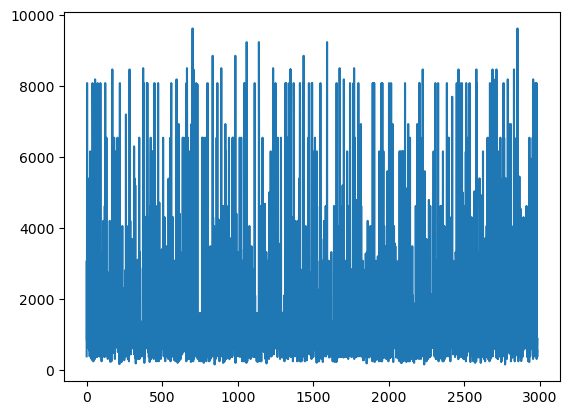

In [508]:
plt.plot(y)

In [661]:
x

,dst_state,vol_wt,obj_cost,org_state,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,distance
0,29,380,2812,21,0,1,0,1,0,1,1908.658931
1,19,5775,11794,34,0,0,0,1,0,0,969.672915
2,10,1800,7489,34,0,0,0,0,0,1,169.423101
3,35,20295,19442,11,0,0,1,1,0,1,1361.639408
4,29,530,15243,10,0,0,0,1,0,1,2388.791462
...,...,...,...,...,...,...,...,...,...,...,...
2980,15,70,6261,34,0,0,0,0,0,0,1397.416512
2981,19,1347,19194,6,0,0,0,1,0,0,948.281271
2982,29,1800,22329,15,0,0,1,1,0,1,176.092743
2983,3,5775,6731,28,0,1,0,0,1,0,639.981953


In [662]:
y

0        380.0
1       3075.0
2        825.0
3       8085.0
4        625.0
         ...  
2980     380.0
2981     565.0
2982     363.0
2983     560.0
2984     870.0
Name: price, Length: 2985, dtype: float64

In [663]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12)

In [664]:
x_train

,dst_state,vol_wt,obj_cost,org_state,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,distance
1452,9,329,6449,35,1,0,0,0,0,1,1952.412719
2535,1,329,6734,15,0,0,1,0,0,0,1131.554900
2601,15,7854,7499,6,0,0,0,0,0,1,1258.680988
2336,27,3900,14109,35,1,0,0,0,0,1,1351.828687
718,9,657,22346,11,0,0,1,0,0,0,1230.763795
...,...,...,...,...,...,...,...,...,...,...,...
1987,11,361,8658,7,1,0,0,0,0,1,264.653362
1283,10,6363,13740,15,0,0,1,0,0,0,7874.004668
1414,15,380,4061,1,0,0,0,0,0,1,1237.181779
1691,8,380,21043,34,0,0,0,0,0,1,6304.146205


In [665]:
def test_accuracy(models):
    for i in models:
        i.fit(x_train,np.log(y_train))
        pred=pd.Series(i.predict(x_test)).abs()
        print("{}:{}".format(i,mean_squared_log_error(y_test, np.exp(pred))))

In [666]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [667]:
ran=RandomForestRegressor(n_jobs=-1)
grad=GradientBoostingRegressor()
xgb=XGBRegressor()
lgb=LGBMRegressor()
cat=CatBoostRegressor(verbose=200)

In [668]:
models=[xgb, ran, lgb, grad, cat]
test_accuracy(models)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...):0.209555327444695
RandomForestRegressor(n_jobs=-1):0.1931412930275933
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tot

In [484]:
reg1 = XGBRegressor()
reg1.fit(x_train,np.log(y_train),eval_set=[(x_train,np.log(y_train)),(x_test,np.log(y_test))],verbose=200)

[0]	validation_0-rmse:0.72037	validation_1-rmse:0.70935
[99]	validation_0-rmse:0.24790	validation_1-rmse:0.45829


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [669]:
ypred_xgb = pd.Series(grad.predict(x_test)).abs()
mean_squared_log_error(y_test,np.exp(ypred_xgb))

0.1620938983385443

In [670]:
x_test

,dst_state,vol_wt,obj_cost,org_state,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,distance
2584,29,361,8492,34,0,0,0,1,0,1,2045.297805
1566,34,329,3176,29,1,0,0,0,0,1,1731.583693
2087,35,1800,6770,35,1,0,1,1,0,0,356.024257
221,1,321,4351,29,1,0,1,0,0,1,380.825086
381,1,321,22770,11,0,0,1,0,0,1,1724.517930
...,...,...,...,...,...,...,...,...,...,...,...
1368,10,530,20063,15,0,0,1,0,0,0,2167.086250
71,29,329,4080,27,0,0,0,1,0,1,1746.294765
2659,27,321,17502,10,0,0,0,0,0,1,633.971327
1499,34,1800,7738,7,1,0,0,0,0,0,385.201965


In [671]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 2985, number of used features: 11
[LightGBM] [Info] Start training from score 6.934149


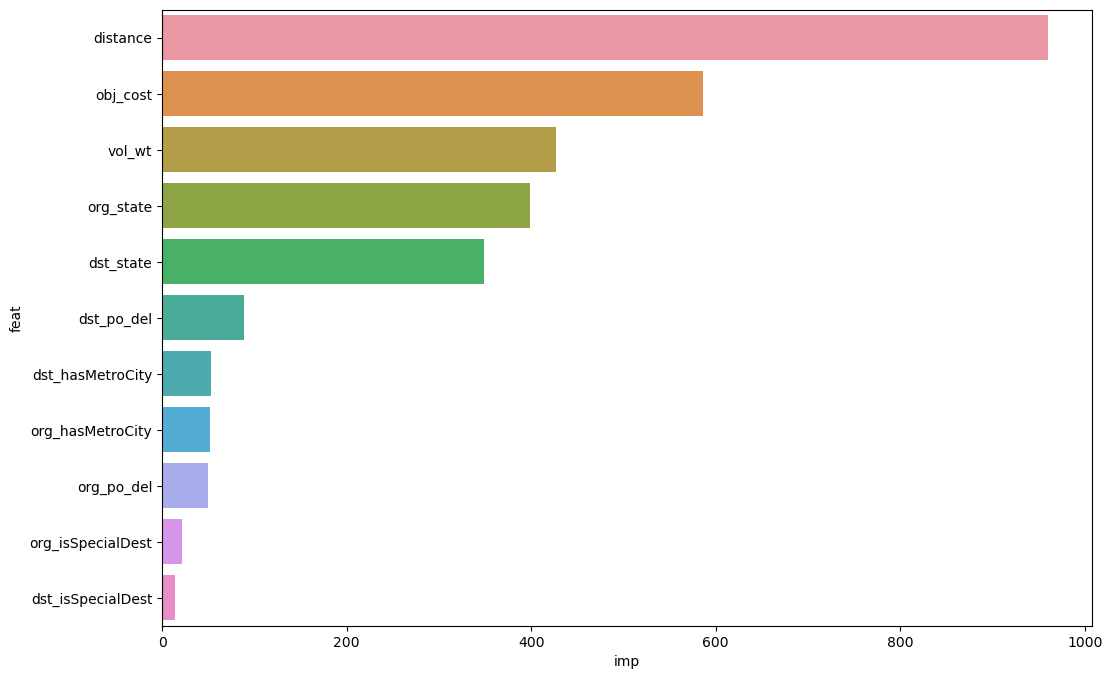

In [672]:
plt.figure(figsize=(12,8))
lgb.fit(x,np.log(y))
a=zip(x.columns,lgb.feature_importances_)
feat_imp=pd.DataFrame(a)
feat_imp.columns=["feat","imp"]
feat_imp=feat_imp.sort_values(by="imp", ascending=False)
sns.barplot(data=feat_imp, x="imp", y="feat");

In [680]:
randTst=pd.read_csv('../randomTest.csv')

In [681]:
randTst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_pin            1 non-null      int64  
 1   dst_pin            1 non-null      int64  
 2   dst_state          1 non-null      object 
 3   vol_wt             1 non-null      int64  
 4   obj_cost           1 non-null      int64  
 5   org_lat            1 non-null      float64
 6   org_long           1 non-null      float64
 7   org_hasMetroCity   1 non-null      int64  
 8   org_isSpecialDest  1 non-null      int64  
 9   org_po_del         1 non-null      int64  
 10  org_state          1 non-null      object 
 11  dst_lat            1 non-null      float64
 12  dst_long           1 non-null      float64
 13  dst_hasMetroCity   1 non-null      int64  
 14  dst_isSpecialDest  1 non-null      int64  
 15  dst_po_del         1 non-null      int64  
 16  distance           1 non-null 

In [446]:
randTst['dst_pin']=515731

In [655]:
randTst

,dst_state,vol_wt,obj_cost,org_state,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,distance
0,0,5500,2100,6,1,0,1,0,0,1,1403.28


In [682]:
randTst['dst_state']

0    ANDHRAPRADESH
Name: dst_state, dtype: object

In [ ]:
sta

In [427]:
randTst['org_state'] = 6

In [428]:
randTst

,org_pin,dst_pin,dst_state,vol_wt,obj_cost,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del,org_state,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,distance
0,110058,522007,0,5500,2100,28.624111,77.096574,1,0,1,6,16.419264,80.582056,0,0,1,1403.28


In [432]:
randTst.shape

(1, 17)

In [656]:
cols_when_model_builds = reg1.get_booster().feature_names
cols_when_model_builds

['dst_state',
 'vol_wt',
 'obj_cost',
 'org_state',
 'org_hasMetroCity',
 'org_isSpecialDest',
 'org_po_del',
 'dst_hasMetroCity',
 'dst_isSpecialDest',
 'dst_po_del',
 'distance']

In [449]:
randTst = randTst[cols_when_model_builds]


In [471]:
randTst=randTst.drop(['org_pin','dst_pin'],axis=1)

In [487]:
randTst=randTst.drop(['org_lat','org_long','dst_lat','dst_long'],axis=1)

In [571]:
randTst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dst_state          1 non-null      int64  
 1   vol_wt             1 non-null      int64  
 2   obj_cost           1 non-null      int64  
 3   org_state          1 non-null      int64  
 4   org_hasMetroCity   1 non-null      int64  
 5   org_isSpecialDest  1 non-null      int64  
 6   org_po_del         1 non-null      int64  
 7   dst_hasMetroCity   1 non-null      int64  
 8   dst_isSpecialDest  1 non-null      int64  
 9   dst_po_del         1 non-null      int64  
 10  distance           1 non-null      float64
dtypes: float64(1), int64(10)
memory usage: 216.0 bytes


In [673]:
ypred_xgb1 = pd.Series(grad.predict(randTst)).abs()


In [674]:
grad.fit(x,np.log(y))

GradientBoostingRegressor()

In [675]:
ypred_grad=pd.Series(np.exp(grad.predict(x_test))).abs()

In [676]:
ypred_grad

0       556.273237
1       530.107174
2       496.705624
3       344.919017
4       582.818596
          ...     
592     639.411174
593     540.519705
594     393.974088
595     595.464508
596    1498.071585
Length: 597, dtype: float64

In [677]:
np.exp(grad.predict(randTst))[0]

2283.240853211577

In [522]:
ypred_xgb1

0    7.690212
dtype: float64

In [523]:
ypred_xgb

0      6.312233
1      6.304039
2      6.185544
3      5.811680
4      6.385870
         ...   
592    6.458722
593    6.311551
594    5.946961
595    6.236743
596    7.251879
Length: 597, dtype: float64

In [491]:
y_test

2584    380
1566    625
2087    475
221     435
381     600
       ... 
1368    870
71      380
2659    360
1499    695
1445    800
Name: price, Length: 597, dtype: int64

0       614.896179
1       509.251312
2       401.418732
3       294.345673
4       620.999146
          ...     
592     661.875916
593     578.673950
594     352.800232
595     494.642853
596    1158.822876
Length: 597, dtype: float32

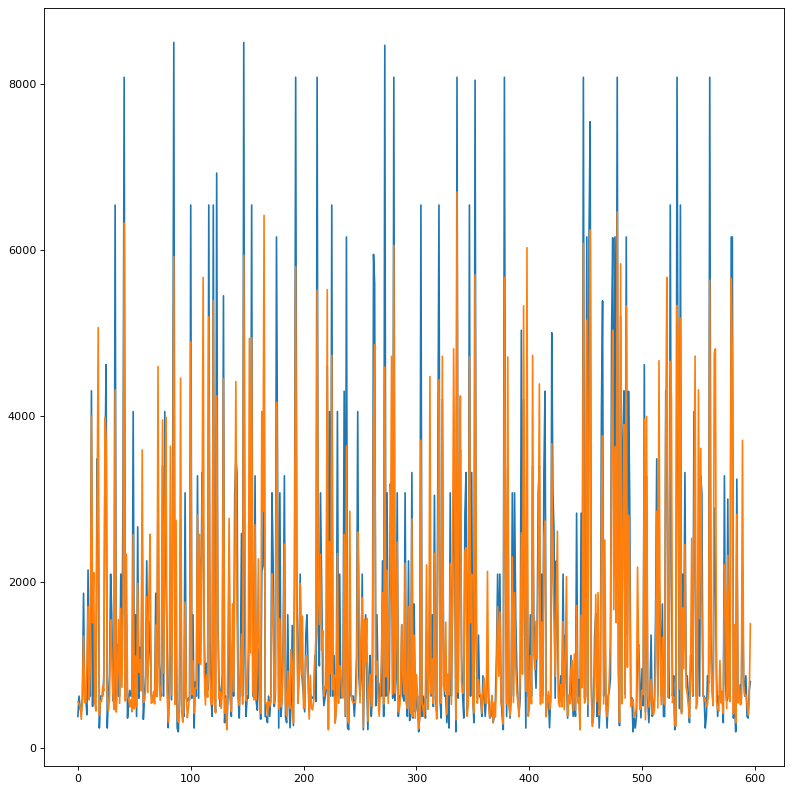

In [558]:
from matplotlib.pyplot import figure
figure(figsize=(10, 10), dpi=80)
plt.plot(yt)
plt.tight_layout()
plt.plot(ypred_grad)


In [550]:
yt=y_test.reset_index(drop=True)

In [560]:
from sklearn.metrics import r2_score
score = r2_score(yt, ypred_grad)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 79.0%


In [562]:
import pickle
with open('1stmodel.pkl','wb') as f:
    pickle.dump(grad,f)

In [572]:
sklearn.__version__

NameError: name 'sklearn' is not defined

In [573]:
import sklearn

In [574]:
sklearn.__version__

'1.2.1'

In [575]:
pincode_data

,org_pin,org_state,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del
0,515631,ANDHRAPRADESH,14.561000,77.854260,0,0,1
1,515581,ANDHRAPRADESH,14.248000,78.254890,0,0,1
2,515571,ANDHRAPRADESH,13.922672,78.201171,0,0,1
3,515311,ANDHRAPRADESH,13.805106,77.043906,0,0,1
4,515281,ANDHRAPRADESH,14.128104,76.980103,0,0,1
...,...,...,...,...,...,...,...
19295,744209,ANDAMANANDNICOBARISLANDS,12.380685,92.802739,0,1,1
19296,744101,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,0
19297,744203,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,1
19298,744106,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1,1
